<b><h2>Project Akhir</h2></b>
<h3>Praktikum Kecerdasan Buatan</h3>
<h3>Deep Learning - Image Processing</h3>

<b><h3>Klasifikasi Jenis Sepatu</h3></b>

Nama Anggota Kelompok 5 Kelas B1'20
1. Muhammad Reyhan Setiawan 2009106052
2. Rahmayanti 2009106068

# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import splitfolders
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator

# Data Collecting

Dataset yang digunakan berupa gambar Sepatu dengan 4 Jenis yang berbeda

Source Dataset: <a href="https://www.kaggle.com/datasets/noobyogi0100/shoe-dataset">Shoe Dataset - Kaggle</a>

Total gambar keseluruhan setelah dibersihkan dan disamakan ukuran gambarnya secara manual: 900 gambar



# Data Preprocessing

Sebelum lanjut ke tahap preprocessing, data akan dibagi 3 terlebih dahulu menjadi:

Data Training, Validation, dan Testing dengan rasio 70%, 10%, 20% yang disimpan ke dalam folder datasets

Folder raw_datasets merupakan source path atau tempat awal data gambar sebelum displit

In [2]:
source_path = r'./raw_datasets'

In [3]:
splitfolders.ratio(
    source_path,
    output='datasets',
    ratio=(0.7, 0.1, 0.2)
)

Copying files: 900 files [00:01, 566.16 files/s]


Menentukan folder dari Data Training, Validation, dan Testing

In [4]:
train_path = 'datasets/train'
val_path = 'datasets/val' 
test_path = 'datasets/test'

os.listdir(train_path)

['boots', 'loafers', 'sneakers', 'soccers']

Membuat generator untuk melakukan augmentasi pada Data Training, Validation, dan Testing. 

Paramater yang digunakan Data Train adalah rescale, shear_range, zoom_range, rotation_range, dan horizontal_flip. 

Sedangkan Data Val dan Test hanya menggunakan rescale

In [5]:
#datagen training
train_datagen = ImageDataGenerator(   
    rescale=1./255,
    shear_range=.2,
    zoom_range=.1,
    rotation_range=30,
    horizontal_flip=True
)

#datagen validation
val_datagen = ImageDataGenerator(
    rescale=1./255
)

#datagen testing
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(200,200),
    batch_size=32,
    class_mode='categorical',
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(200,200),
    batch_size=32,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(200,200),
    batch_size=32,
    class_mode='categorical',
)

Found 628 images belonging to 4 classes.
Found 88 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


# Data Visualization

Ini merupakan tahap visualisasi dataset gambar yang akan menampilkan jumlah file seluruh gambar 

dan tiap folder yang telah displit per jenisnya menggunakan grafik batang

In [28]:
labels_name = ['boots', 'loafers', 'sneakers', 'soccers']

In [29]:
image, label = train_generator.next()

Jumlah File Keseluruhan Data

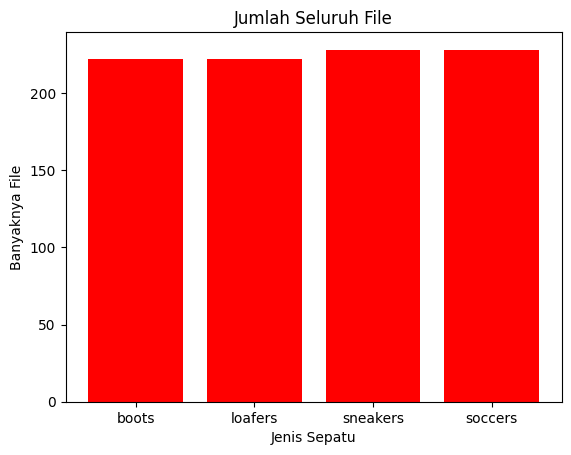

In [30]:
jumlah_file = []

for jenis in os.listdir(source_path):
    jenis_file = os.listdir(os.path.join(source_path, jenis))
    banyaknya_file = len(jenis_file)
    jumlah_file.append(banyaknya_file)

x = labels_name
y = jumlah_file
plt.bar(x, y, color='red')
plt.title('Jumlah Seluruh File')
plt.xlabel('Jenis Sepatu')
plt.ylabel('Banyaknya File')
plt.show()

Jumlah File Data Training

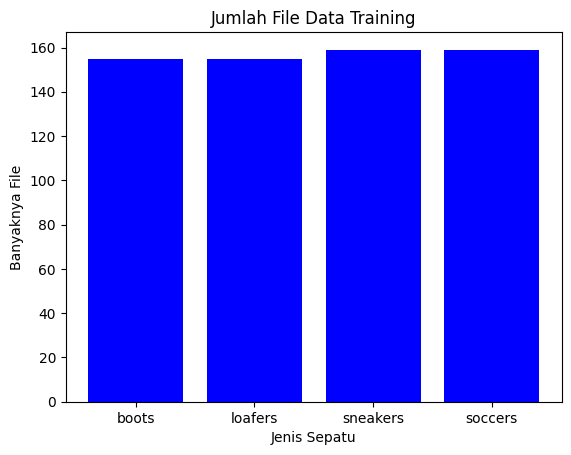

In [31]:
jumlah_file_train = []

for jenis in os.listdir(train_path):
    jenis_file = os.listdir(os.path.join(train_path, jenis))
    banyaknya_file = len(jenis_file)
    jumlah_file_train.append(banyaknya_file)

x = labels_name
y = jumlah_file_train
plt.bar(x, y, color='blue')
plt.title('Jumlah File Data Training')
plt.xlabel('Jenis Sepatu')
plt.ylabel('Banyaknya File')
plt.show()

Jumlah File Data Validation

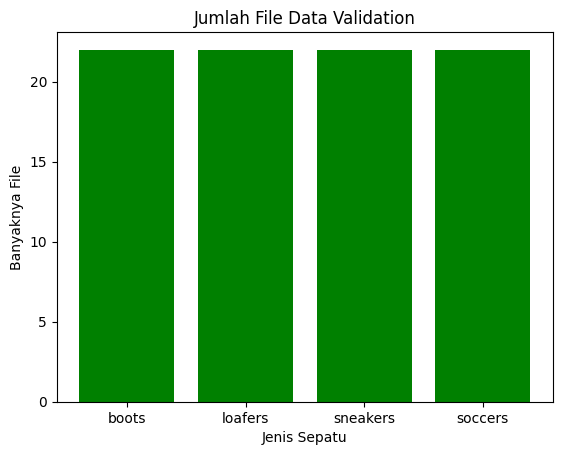

In [32]:
jumlah_file_val = []

for jenis in os.listdir(val_path):
    jenis_file = os.listdir(os.path.join(val_path, jenis))
    banyaknya_file = len(jenis_file)
    jumlah_file_val.append(banyaknya_file)

x = labels_name
y = jumlah_file_val
plt.bar(x, y, color='green')
plt.title('Jumlah File Data Validation')
plt.xlabel('Jenis Sepatu')
plt.ylabel('Banyaknya File')
plt.show()

Jumlah File Data Testing

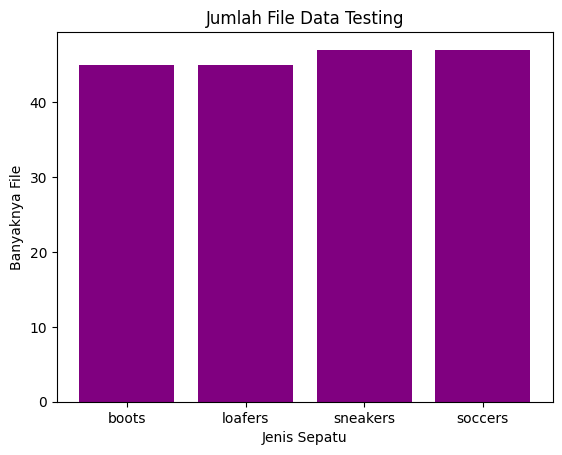

In [33]:
jumlah_file_test = []

for jenis in os.listdir(test_path):
    jenis_file = os.listdir(os.path.join(test_path, jenis))
    banyaknya_file = len(jenis_file)
    jumlah_file_test.append(banyaknya_file)

x = labels_name
y = jumlah_file_test
plt.bar(x, y, color='purple')
plt.title('Jumlah File Data Testing')
plt.xlabel('Jenis Sepatu')
plt.ylabel('Banyaknya File')
plt.show()

Melihat berapa gambar dan ukurannya yang sudah ditentukan batch_size dan target_size pada saat membuat generator

In [34]:
len(image)

32

In [35]:
print(image.shape)

(32, 200, 200, 3)


Menampilkan beberapa gambar berdasarkan jenisnya

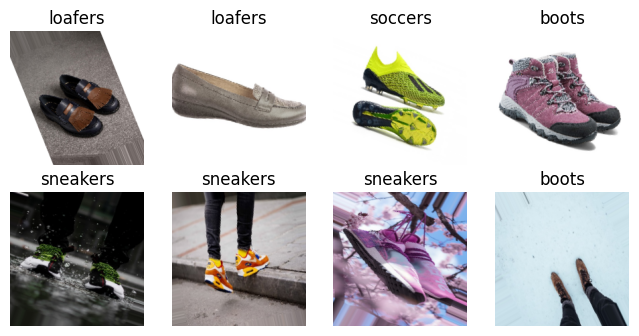

In [36]:
plt.figure(figsize=(8,8))
for i in range(8):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image[i])
  plt.title(labels_name[tf.argmax(label[i])])
  plt.axis("off")

Menampilkan 5 gambar hasil dari preprocessing sesuai dengan ketentuan augmentasi di atas

(32, 200, 200, 3)


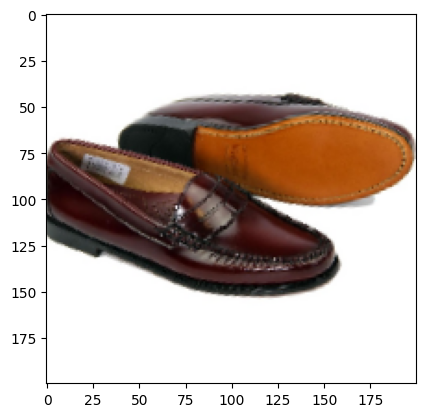

(32, 200, 200, 3)


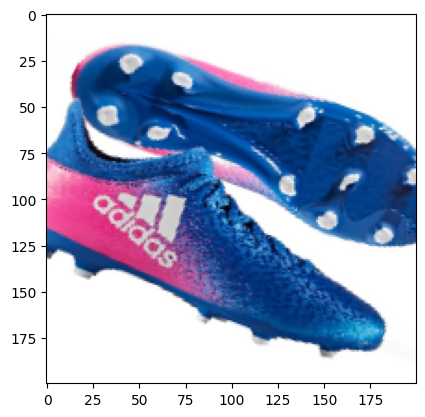

(32, 200, 200, 3)


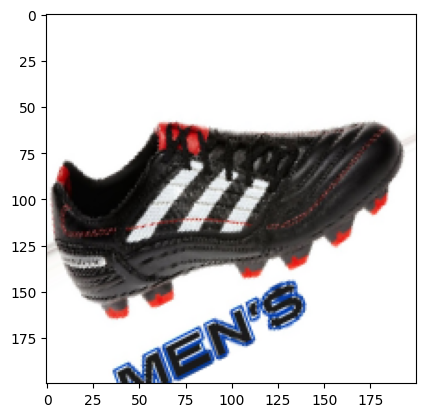

(32, 200, 200, 3)


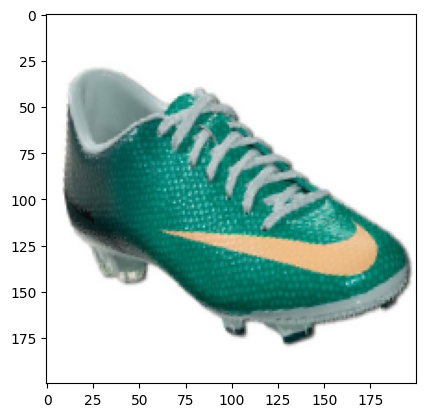

(32, 200, 200, 3)


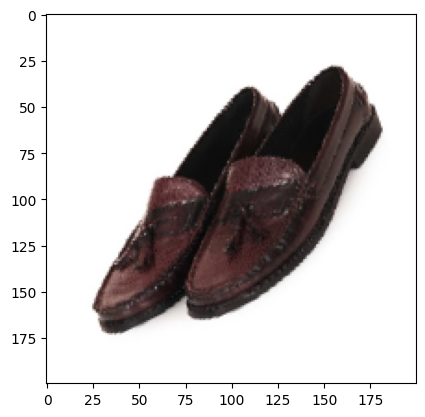

In [37]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)
    plt.imshow(img[5])
    plt.show()

# Data Modeling

Menyusun layer sequential menggunakan Convolution Layer

In [38]:
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    # Output Layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # Hidden Layer
    tf.keras.layers.Dense(4, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Mengcompile model yang telah dibuat

In [40]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Lalu latih model dengan epoch sebanyak 25 epoch

In [41]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data = val_generator
)

Epoch 1/25
20/20 [==============================] - 17s 826ms/step - loss: 7.2703 - accuracy: 0.2500 - val_loss: 1.3549 - val_accuracy: 0.2500
Epoch 2/25
20/20 [==============================] - 17s 865ms/step - loss: 1.3175 - accuracy: 0.2898 - val_loss: 1.2081 - val_accuracy: 0.3295
Epoch 3/25
20/20 [==============================] - 17s 833ms/step - loss: 1.1957 - accuracy: 0.4140 - val_loss: 1.1445 - val_accuracy: 0.4886
Epoch 4/25
20/20 [==============================] - 17s 827ms/step - loss: 1.1148 - accuracy: 0.5239 - val_loss: 1.0714 - val_accuracy: 0.6023
Epoch 5/25
20/20 [==============================] - 17s 840ms/step - loss: 0.9483 - accuracy: 0.6290 - val_loss: 0.9711 - val_accuracy: 0.6477
Epoch 6/25
20/20 [==============================] - 17s 843ms/step - loss: 0.9202 - accuracy: 0.5987 - val_loss: 1.1399 - val_accuracy: 0.5227
Epoch 7/25
20/20 [==============================] - 17s 845ms/step - loss: 0.8266 - accuracy: 0.6608 - val_loss: 1.0099 - val_accuracy: 0.5682

# Evaluasi

Menampilkan Visualisasi Training dan Validation Accuracy

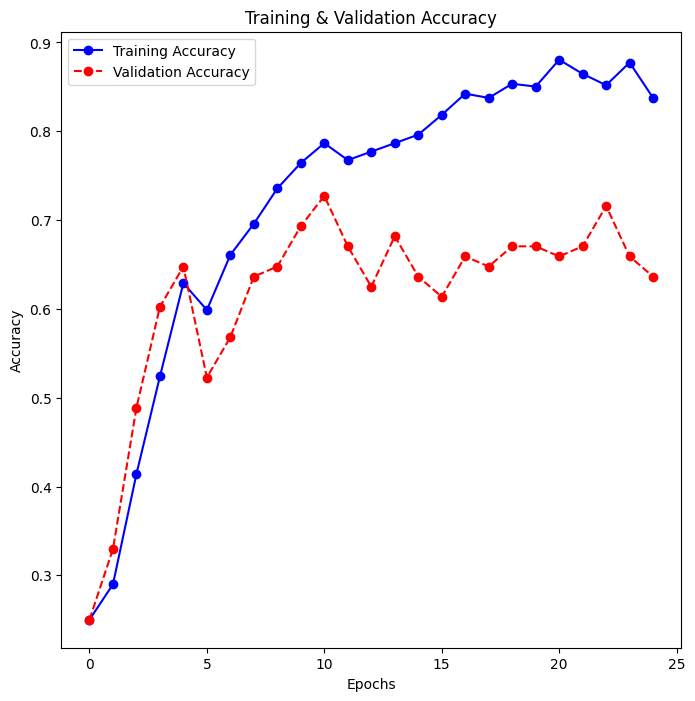

In [42]:
plt.figure(1, figsize=(8,8))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'], 'ro--', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Menampilkan Visualisasi Training dan Validation Loss

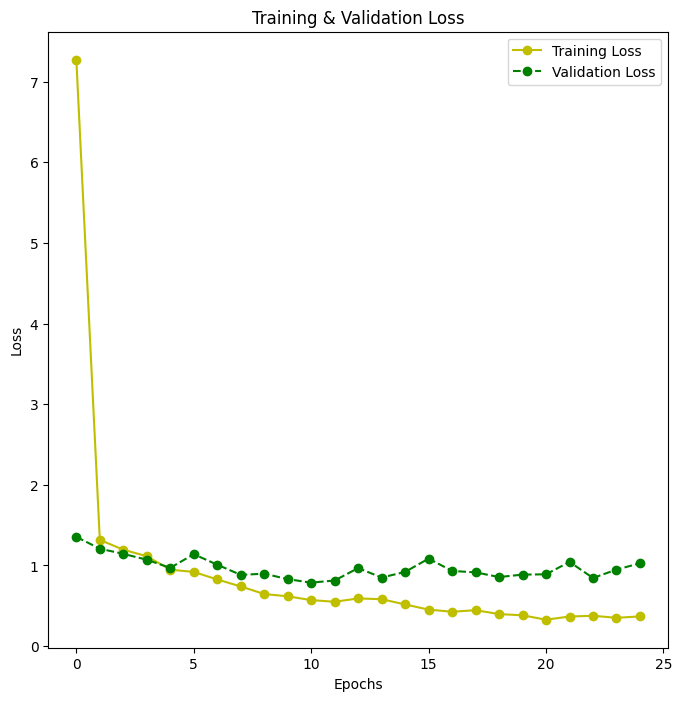

In [43]:
plt.figure(1, figsize=(8,8))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'], 'yo-', label='Training Loss')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],'go--', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Menyimpan Model

In [51]:
model.save('./model/model_finished')
model.save('./model/model_finished.h5')

INFO:tensorflow:Assets written to: ./model/model_finished\assets


INFO:tensorflow:Assets written to: ./model/model_finished\assets


Menguji model dengan melakukan evaluasi pada model yang telah ditraining untuk melihat akurasi pada data Testing.

Evaluasi dilakukan menggunakan test_evaluate = model.evaluate

In [44]:
test_evaluate = model.evaluate(test_generator, verbose=0)
print(f'Test Loss     : {test_evaluate[0]}')
print(f'Test Accuracy : {round(test_evaluate[1],2)}')

Test Loss     : 1.0416969060897827
Test Accuracy : 0.75


Menampilkan hasil prediksi gambar apakah sesuai dengan label gambarnya menggunakan model.predict

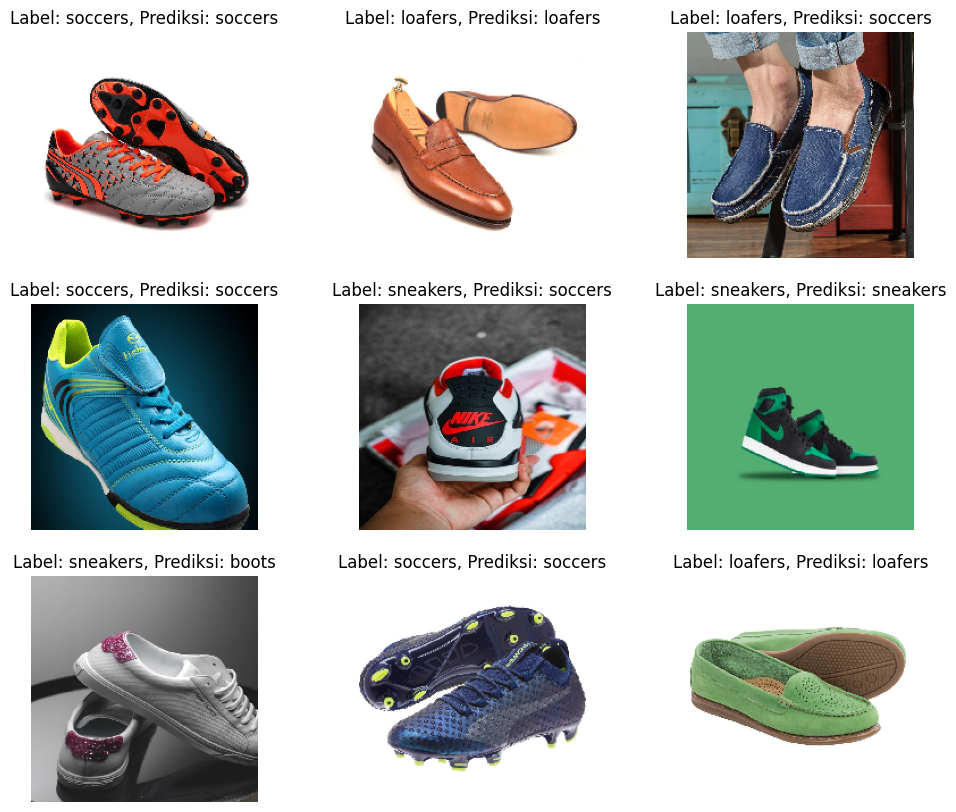

In [50]:
image, label = next(iter(test_generator))

plt.figure(figsize=(12,10))
for i in range(9) :
    TrueLabel = labels_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'Label: {TrueLabel}, Prediksi: {labels_name[y_pred]}')